A very rough set of bounds of the parameters found by trying out lots of numbers in the code below
\begin{align}
110 < & g_{Na} < 1000 \\
5 < & g_{K} < 37 \\
-0.2 < & g_{L} < 0.35 \\
111 < &E_{Na} < 1200\\
-14.0 < &E_{K} < 2 \\
5 < &E_{L} < 180\\
0 < &C < 5
\end{align}


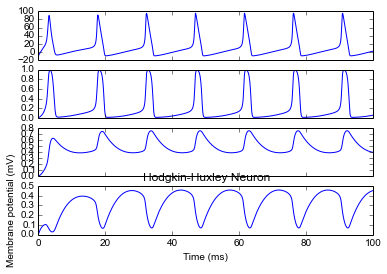

In [121]:
from HH import *
from tqdm import tqdm

%matplotlib inline

# SET UP DATA STRUCTURES
# Create time points
dt = 0.01
Tmin = 0
Tmax= 100
I = 10.0

T = np.arange(Tmin, Tmax+dt, dt)

s_e = np.zeros((len(T), 4))
s_e[0] = np.array([-10.0, 0., 0., 0.])

s_rk4 = np.zeros((len(T), 4))
s_rk4[0] = np.array([-10.0, 0., 0., 0.])

# DO THE INTEGRATION
# Approximated solution with small integration Step
Euler = False
Runge = True
##########################################################
#         gNa     gK    gL   ENa    EK     EL    C
params = [120.0, 36.0, 0.3, 115.0, -12.0, 10.6, 1.0]
##########################################################
for t in tqdm(xrange(1, len(T))):
    if(Euler):
        s_e[t] = s_e[t-1] + dt*s_dt_simple(s_e[t-1], I,params)
    if(Runge):
        # Calculate the four constants of Runge-Kutta method
        k_1 = s_dt_simple(s_rk4[t-1], I,params)
        k_2 = s_dt_simple(s_rk4[t-1] + 0.5*dt*k_1, I,params)
        k_3 = s_dt_simple(s_rk4[t-1] + 0.5*dt*k_2, I,params)
        k_4 = s_dt_simple(s_rk4[t-1] + dt*k_3, I,params)
        s_rk4[t] = s_rk4[t-1] + (1.0/6)*dt*(k_1 + 2*k_2 + 2*k_3 + k_4)


## Plot the membrane potential
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(4, sharex=True)
plt.title('Hodgkin-Huxley Neuron')
for i in xrange(4):
    axarr[i].plot(T,s_rk4[:, i])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.show()